In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils

from keras import backend as K
K.set_image_dim_ordering('th')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cv2
import os
# import theano
from PIL import Image
from numpy import *
# SKLEARN
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

Using TensorFlow backend.
/Users/sachaura/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/Users/sachaura/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# input image dimensions
img_rows, img_cols = 28, 28

# number of channels
img_channels = 1

In [3]:
path1 = '/home/saumya/Desktop/Telugu/telgu_dataset'    #path of folder of images
data_path = '/Users/sachaura/Downloads/OriyaNumerals'    #path of folder of images

# listing = os.listdir(path1) 
# num_samples=size(listing)
# print (num_samples)
#for file in listing:
    #im = Image.open(path1 + '/' + file)  
    #img = im.resize((img_rows,img_cols))
    #gray = img.convert('L')
                #need to do some more processing here          
    #gray.save(path2 +'/' +  file, "bmp")

imlist = os.listdir(data_path)
data_dir_list = os.listdir(data_path)

In [4]:
num_channel=1
num_epoch=1

# Define the number of classes
print(data_path)
img_data_list=[]
for dataset in data_dir_list:
    if(dataset != ".DS_Store"):
        img_list=os.listdir(data_path+'/'+ dataset)
        print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
        for img in img_list:
            input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
            if(img != ".DS_Store"):
#                 print(data_path + '/'+ dataset + '/'+ img)
                input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
                input_img_resize=cv2.resize(input_img,(28,28))
                img_data_list.append(input_img_resize)


# for dataset in data_dir_list:
# # 	img_list=os.listdir(data_path+'/'+ dataset)
# # 	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
# # 	for img in dir_list:
# 	input_img=cv2.imread(data_path + '/'+ dataset )
# 	input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
# 	input_img_resize=cv2.resize(input_img,(28,28))
# 	img_data_list.append(input_img_resize)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

if num_channel==1:
	if K.image_dim_ordering()=='th':
		img_data= np.expand_dims(img_data, axis=1) 
		print (img_data.shape)
	else:
		img_data= np.expand_dims(img_data, axis=4) 
		print (img_data.shape)
		
else:
	if K.image_dim_ordering()=='th':
		img_data=np.rollaxis(img_data,3,1)
		print (img_data.shape)
		
num_classes = 10

num_of_samples = img_data.shape[0]
label = np.ones((num_of_samples,),dtype='int64')

/Users/sachaura/Downloads/OriyaNumerals
Loaded the images of dataset-0

Loaded the images of dataset-1

Loaded the images of dataset-2

Loaded the images of dataset-3

Loaded the images of dataset-4

Loaded the images of dataset-5

Loaded the images of dataset-6

Loaded the images of dataset-7

Loaded the images of dataset-8

Loaded the images of dataset-9

(5770, 28, 28)
(5770, 1, 28, 28)


[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
label :  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


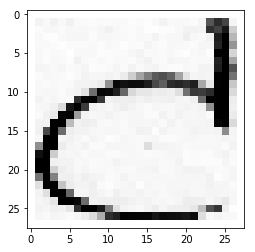

In [5]:
# # create matrix to store all flattened images
# immatrix = array([array(Image.open('/home/saumya/Desktop/Telugu/t' + '/'+  im2)).flatten()
#               for im2 in imlist],'f')
# #print(immatrix)
# num_class=10
               
# label=np.ones((num_samples,),dtype = int)
label[1:504]=0
label[504:1004]=1
label[1004:1501]=2
label[1501:2000]=3
label[2000:2499]=4
label[2499:2990]=5
label[2990:3491]=6
label[3491:3990]=7
label[3990:4489]=8
label[4489:4980]=9

names = ['0', '1', '2', '3', '4', '5', '6', '7', '8','9']
# Y = np_utils.to_categorical(label, num_class)
# data,Label = shuffle(immatrix,Y, random_state=2)
# train_data = [data,Label]
# np.savetxt('/home/saumya/Desktop/svm_input_data/ny_test.csv', Label, delimiter = ',') 
# img=immatrix[17].reshape(img_rows,img_cols)
# plt.imshow(img)
# plt.show()

# convert class labels to on-hot encoding
Y = np_utils.to_categorical(label, num_classes)
print(Y)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

i = 67
plt.imshow(X_train[i, 0], interpolation='nearest', cmap = 'gray')
print("label : ", y_train[i,:])


input_shape=img_data[0].shape

In [6]:
model = Sequential()

model.add(Convolution2D(32, 3,3,border_mode='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
# model.add(Convolution2D(64, 3, 3))
# model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, name = 'first_dense_layer'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

/Users/sachaura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(1, 28, 28..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sachaura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  """
/Users/sachaura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.


In [7]:
model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape			
model.layers[0].output_shape			
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 28, 28)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 28, 28)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 26, 26)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 26, 26)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 13, 13)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 13, 13)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 11, 11)        9248      
__________

True

In [8]:

# Training
hist = model.fit(X_train, y_train, batch_size=64, nb_epoch=10, verbose=1, validation_data=(X_test, y_test))
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

/Users/sachaura/anaconda3/lib/python3.6/site-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 4616 samples, validate on 1154 samples
Epoch 1/10
4616/4616 [==============================] - 25s - loss: 1.8470 - acc: 0.3362 - val_loss: 1.4633 - val_acc: 0.4766
Epoch 2/10
4616/4616 [==============================] - 27s - loss: 1.3574 - acc: 0.5041 - val_loss: 1.1534 - val_acc: 0.5702
Epoch 3/10
4616/4616 [==============================] - 30s - loss: 1.1399 - acc: 0.5765 - val_loss: 1.0015 - val_acc: 0.6308
Epoch 4/10
4616/4616 [==============================] - 32s - loss: 1.0275 - acc: 0.5986 - val_loss: 1.0007 - val_acc: 0.5719
Epoch 5/10
4616/4616 [==============================] - 32s - loss: 0.9414 - acc: 0.6282 - val_loss: 0.8390 - val_acc: 0.6568
Epoch 6/10
4616/4616 [==============================] - 33s - loss: 0.8881 - acc: 0.6417 - val_loss: 0.8385 - val_acc: 0.6447
Epoch 7/10
4616/4616 [==============================] - 34s - loss: 0.8589 - acc: 0.6469 - val_loss: 0.8070 - val_acc: 0.6612
Epoch 8/10
4616/4616 [==============================] - 33s - loss: 0.

In [9]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7523201972607724
Test accuracy: 0.6776429809358753


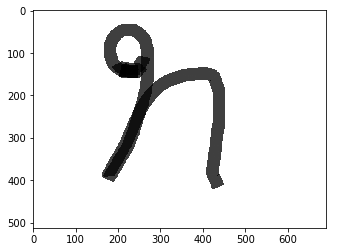

(28, 28)
(1, 1, 28, 28)
[[3.69e-05 1.44e-02 1.02e-03 3.25e-02 4.23e-01 5.00e-01 1.90e-02 2.99e-04
  1.37e-03 8.70e-03]]
1/1 [==============================] - 0s
[5]


In [89]:
# Testing a new image
test_image = cv2.imread('/Users/sachaura/Downloads/digits/3_o.png')
plt.imshow(test_image)
plt.show()
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(28,28))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)
   
if num_channel==1:
	if K.image_dim_ordering()=='th':
		test_image= np.expand_dims(test_image, axis=0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=3) 
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
else:
	if K.image_dim_ordering()=='th':
		test_image=np.rollaxis(test_image,2,0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
# Predicting the test image
print((model.predict(test_image)))

print(model.predict_classes(test_image))

In [73]:
score = model.evaluate(X_test, y_test, verbose=0)

test_image = X_test[120:121]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[120:121])

(1, 1, 28, 28)
[[3.17e-10 8.34e-04 6.13e-06 1.62e-04 3.83e-01 6.10e-01 6.43e-03 9.24e-07
  6.54e-07 9.41e-05]]
1/1 [==============================] - 0s
[5]
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [74]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
# print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
# print(y_pred)
#y_pred = model.predict_classes(X_test)
#print(y_pred)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4', 'class 5', 'class 6','class 7','class 8', 'class 9']
					
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

             precision    recall  f1-score   support

    class 0       0.81      0.98      0.89       112
    class 1       0.76      0.68      0.71       238
    class 2       0.53      0.53      0.53       111
    class 3       0.51      0.48      0.49        81
    class 4       0.43      0.23      0.30        92
    class 5       0.52      0.52      0.52       107
    class 6       0.68      0.70      0.69       120
    class 7       0.80      0.83      0.81       104
    class 8       0.69      0.89      0.78        90
    class 9       0.65      0.75      0.70        99

avg / total       0.66      0.67      0.66      1154

[[110   2   0   0   0   0   0   0   0   0]
 [ 24 161   8   0   3   0   3   0   0  39]
 [  0  43  59   4   1   0   0   0   4   0]
 [  0   0  32  39   8   0   0   0   2   0]
 [  0   2   0  31  21  37   0   0   1   0]
 [  0   0   0   0  14  56  37   0   0   0]
 [  0   0   0   1   0  13  84  20   2   0]
 [  1   0   6   1   0   0   0  86  10   0]
 [  0   2   6   0

Confusion matrix, without normalization
[[110   2   0   0   0   0   0   0   0   0]
 [ 24 161   8   0   3   0   3   0   0  39]
 [  0  43  59   4   1   0   0   0   4   0]
 [  0   0  32  39   8   0   0   0   2   0]
 [  0   2   0  31  21  37   0   0   1   0]
 [  0   0   0   0  14  56  37   0   0   0]
 [  0   0   0   1   0  13  84  20   2   0]
 [  1   0   6   1   0   0   0  86  10   0]
 [  0   2   6   0   1   0   0   1  80   0]
 [  0   3   1   1   1   1   0   1  17  74]]


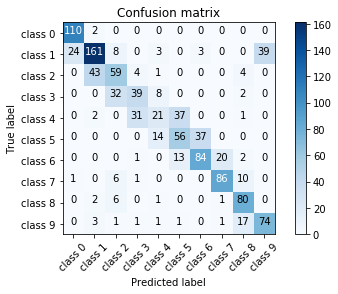

In [75]:
import matplotlib.pyplot as plt
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
plt.show()

In [76]:
import numpy
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from cv2 import CV_64F
K.set_image_dim_ordering('th')

In [77]:
model_dense_layer_output = Model(input=model.input, output=model.get_layer('first_dense_layer').output)
svm_x_train = model_dense_layer_output.predict(X_train)
svm_x_test = model_dense_layer_output.predict(X_test)
# svm_y_train = np.array([x[0] for x in y_train])
svm_y_train = model.predict_classes(X_train)
svm_y_test = model.predict_classes(X_test)


# svm_y_test = np.array([x[0] for x in y_test])

# np.savetxt('/home/saumya/Desktop/svm_telugu_input_data/telu2_svm_x_train.csv', svm_x_train, delimiter = ',') 
# np.savetxt('/home/saumya/Desktop/svm_telugu_input_data/telu2_svm_y_train.csv', svm_y_train, delimiter = ',') 
# np.savetxt('/home/saumya/Desktop/svm_telugu_input_data/telu2_svm_x_test.csv', svm_x_test, delimiter = ',') 
# np.savetxt('/home/saumya/Desktop/svm_telugu_input_data/telu2_svm_y_test.csv', svm_y_test, delimiter = ',') 

print(svm_x_train)

/Users/sachaura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=Tensor("fi...)`
  """Entry point for launching an IPython kernel.


1152/1154 [============================>.] - ETA: 0s[[-1.72  0.95 -2.33 ... -1.44 -1.49  2.58]
 [-2.05 -1.57 -2.79 ... -1.39 -1.33 -0.37]
 [-1.15 -0.98 -0.25 ... -1.84 -1.99 -1.09]
 ...
 [-1.07 -0.02 -0.85 ...  1.71  1.74  1.5 ]
 [-2.38  1.83 -2.73 ... -2.37 -2.85  2.24]
 [-1.33  1.09  3.24 ...  2.9  -1.11  1.82]]


In [61]:
import pandas as pd
data = pd.DataFrame({"0":[1,0,0,0,0,0,0,0,0,0],"1":[0,1,0,0,0,0,0,0,0,0],"2":[0,0,1,0,0,0,0,0,0,0],"3":[0,0,0,1,0,0,0,0,0,0],"4":[0,0,0,0,1,0,0,0,0,0],"5":[0,0,0,0,0,1,0,0,0,0],"6":[0,0,0,0,0,0,1,0,0,0],"7":[0,0,0,0,0,0,0,1,0,0],"8":[0,0,0,0,0,0,0,0,1,0],"9":[0,0,0,0,0,0,0,0,0,1]})

def get_animal(row):
    for c in data.columns:
        if row[c]==1:
            return c

In [64]:
Y.apply(get_animal, axis=1)

AttributeError: 'numpy.ndarray' object has no attribute 'apply'

In [78]:
from cv2 import CV_64F
import cv2
from sklearn import svm
from sklearn import metrics
import random
import json
from keras.models import model_from_json

from sklearn.ensemble import RandomForestClassifier

In [79]:
clf = svm.LinearSVC()
clf.fit(svm_x_train, svm_y_train)

y_predicted = clf.predict(svm_x_test)

In [80]:
print(svm_y_test)

[0 8 1 ... 5 2 9]


[[134   1   0   0   0   0   0   0   0   0]
 [  4 203   0   0   1   1   1   0   2   1]
 [  2   5  94   0   0   0   2   1   8   0]
 [  0   1   5  68   1   0   1   0   1   0]
 [  0   2   0   9  19  19   0   0   0   0]
 [  0   1   0   1   5  90   9   0   0   1]
 [  0   4   0   0   1   2 117   0   0   0]
 [  0   0   2   0   0   0   1 105   0   0]
 [  0   0   0   0   0   0   1   0 115   0]
 [  0   0   0   0   0   0   0   0   0 113]]
Confusion matrix, without normalization
[[134   1   0   0   0   0   0   0   0   0]
 [  4 203   0   0   1   1   1   0   2   1]
 [  2   5  94   0   0   0   2   1   8   0]
 [  0   1   5  68   1   0   1   0   1   0]
 [  0   2   0   9  19  19   0   0   0   0]
 [  0   1   0   1   5  90   9   0   0   1]
 [  0   4   0   0   1   2 117   0   0   0]
 [  0   0   2   0   0   0   1 105   0   0]
 [  0   0   0   0   0   0   1   0 115   0]
 [  0   0   0   0   0   0   0   0   0 113]]
Accuracy:  0.9168110918544194


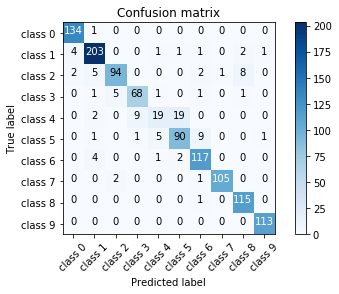

In [81]:
accuracy = metrics.accuracy_score(svm_y_test, y_predicted)
cm = metrics.confusion_matrix(svm_y_test, y_predicted)
print(cm)
plt.imshow(cm)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4', 'class 5', 'class 6','class 7','class 8', 'class 9']
plot_confusion_matrix(cm, classes=target_names,
                      title='Confusion matrix')
print("Accuracy: ",accuracy)

In [82]:
clf = svm.SVC()
clf.fit(svm_x_train, svm_y_train)

y_predicted = clf.predict(svm_x_test)

[[133   1   0   0   0   0   0   0   1   0]
 [  2 205   2   0   0   1   0   0   0   3]
 [  0   6 102   0   0   0   0   1   3   0]
 [  0   0   7  68   2   0   0   0   0   0]
 [  0   1   0   4  33  11   0   0   0   0]
 [  0   0   0   0   2  98   6   0   0   1]
 [  0   1   0   0   0   2 119   1   1   0]
 [  0   0   0   0   0   0   1 107   0   0]
 [  0   0   1   1   1   0   0   0 113   0]
 [  0   0   0   0   0   0   0   0   0 113]]
Confusion matrix, without normalization
[[133   1   0   0   0   0   0   0   1   0]
 [  2 205   2   0   0   1   0   0   0   3]
 [  0   6 102   0   0   0   0   1   3   0]
 [  0   0   7  68   2   0   0   0   0   0]
 [  0   1   0   4  33  11   0   0   0   0]
 [  0   0   0   0   2  98   6   0   0   1]
 [  0   1   0   0   0   2 119   1   1   0]
 [  0   0   0   0   0   0   1 107   0   0]
 [  0   0   1   1   1   0   0   0 113   0]
 [  0   0   0   0   0   0   0   0   0 113]]
Accuracy:  0.9454072790294628


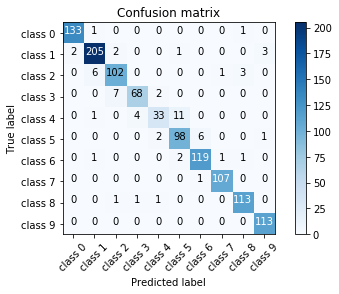

In [83]:
accuracy = metrics.accuracy_score(svm_y_test, y_predicted)
cm = metrics.confusion_matrix(svm_y_test, y_predicted)
print(cm)
plt.imshow(cm)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4', 'class 5', 'class 6','class 7','class 8', 'class 9']
plot_confusion_matrix(cm, classes=target_names,
                      title='Confusion matrix')

print("Accuracy: ",accuracy)

In [84]:
clf = RandomForestClassifier(n_estimators = 75, n_jobs=10, random_state=0)
clf.fit(svm_x_train,svm_y_train)
predicted_output = clf.predict(svm_x_test)

In [85]:
total_test_samples = svm_y_test.shape[0]
correct_predictions=0
for i in range(0,total_test_samples):
    if(predicted_output[i]==svm_y_test[i]):
        correct_predictions+=1
        
accuracy=correct_predictions/(total_test_samples*1.0)
print("Accuracy:",accuracy)

Accuracy: 0.9566724436741768


In [54]:
print(svm_y_train)

[1 6 0 ... 8 5 8]


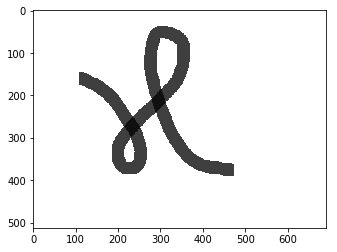

(28, 28)
(1, 1, 28, 28)
[[2.32e-04 4.76e-02 1.32e-02 1.57e-02 9.70e-02 3.49e-01 4.46e-01 6.61e-03
  1.64e-03 2.28e-02]]
1/1 [==============================] - 0s
[6]


In [94]:
# Testing a new image
test_image = cv2.imread('//Users/sachaura/Downloads/digits/5_t.png')
plt.imshow(test_image)
plt.show()
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(28,28))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)
   
if num_channel==1:
	if K.image_dim_ordering()=='th':
		test_image= np.expand_dims(test_image, axis=0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=3) 
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
else:
	if K.image_dim_ordering()=='th':
		test_image=np.rollaxis(test_image,2,0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
# Predicting the test image
print((model.predict(test_image)))

print(model.predict_classes(test_image))

(1, 1, 32, 26, 26)
(32, 26, 26)


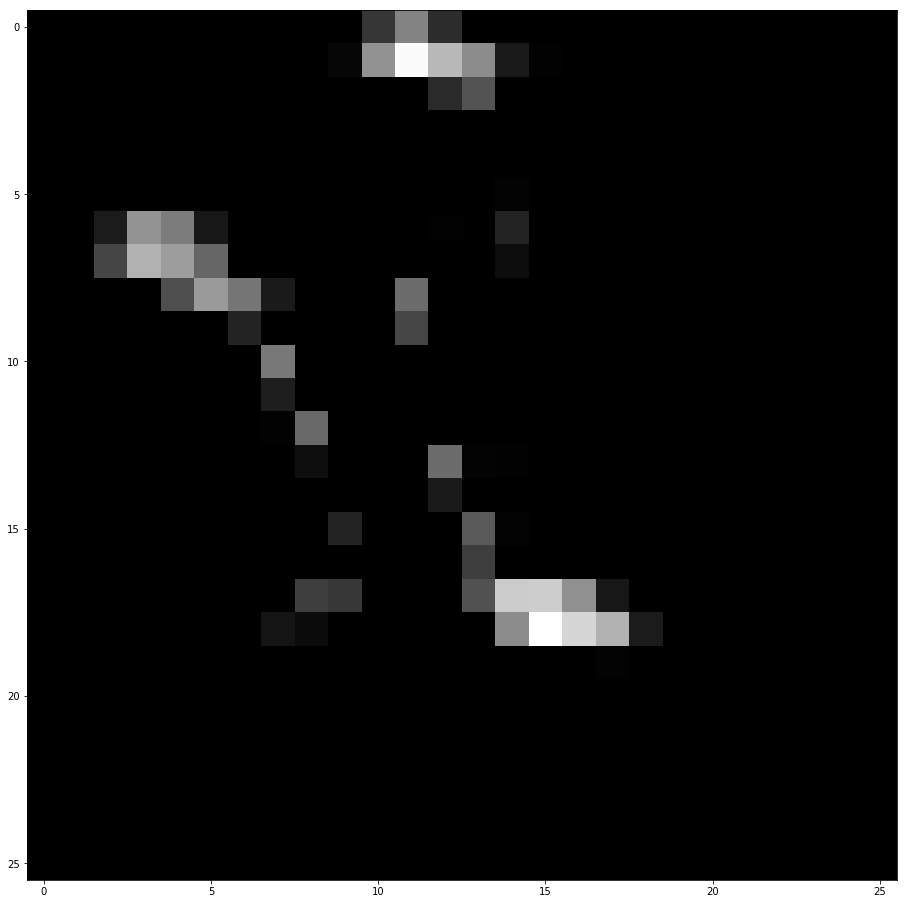

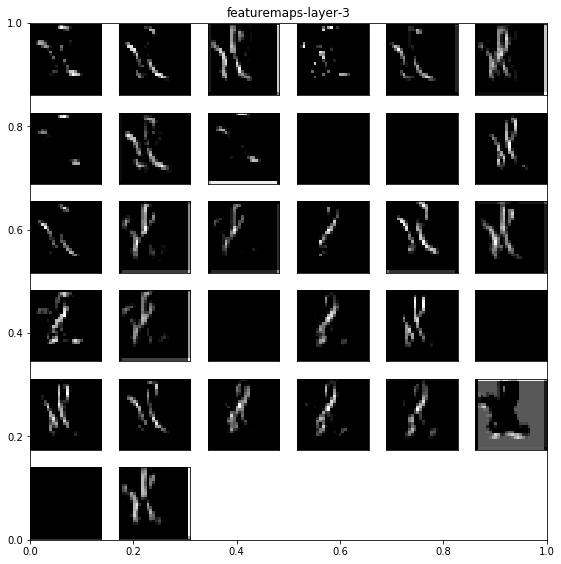

In [95]:
# Visualizing the intermediate layer

#
def get_featuremaps(model, layer_idx, X_batch):
	get_activations = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer_idx].output,])
	activations = get_activations([X_batch,0])
	return activations

layer_num=3
filter_num=0

activations = get_featuremaps(model, int(layer_num),test_image)

print (np.shape(activations))
feature_maps = activations[0][0]  
# print (feature_maps)
print (np.shape(feature_maps))
if K.image_dim_ordering()=='th':
	feature_maps=np.rollaxis((np.rollaxis(feature_maps,2, 0)),2, 0)
# print (feature_maps.shape)

fig=plt.figure(figsize=(16,16))
plt.imshow(feature_maps[:,:,filter_num],cmap='gray')
plt.savefig("featuremaps-layer-{}".format(layer_num) + "-filternum-{}".format(filter_num)+'.jpg')

num_of_featuremaps=feature_maps.shape[2]
fig=plt.figure(figsize=(8,8))	
plt.title("featuremaps-layer-{}".format(layer_num))
subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
for i in range(int(num_of_featuremaps)):
	ax = fig.add_subplot(subplot_num, subplot_num, i+1)
# 	ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
	ax.imshow(feature_maps[:,:,i],cmap='gray')
	plt.xticks([])
	plt.yticks([])
	plt.tight_layout()
plt.show()
fig.savefig("featuremaps-layer-{}".format(layer_num) + '.jpg')

In [101]:
svm_x = model_dense_layer_output.predict(test_image)
print(clf.predict(svm_x))

[6]


In [11]:
# serialize model to JSON
oriyaModel_json = model.to_json()
with open("oriyaModel.json", "w") as json_file:
    json_file.write(oriyaModel_json)
# serialize weights to HDF5
model.save_weights("oriyaModel.h5")
print("Saved model to disk")

Saved model to disk


In [12]:
from keras.models import model_from_json
# load json and create model
json_file = open('oriyaModel.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("oriyaModel.h5")
print("Loaded model from disk")

Loaded model from disk


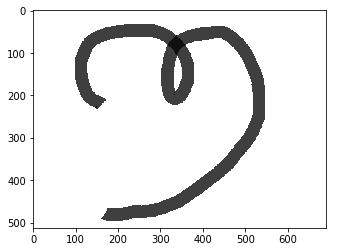

(28, 28)
(1, 1, 28, 28)
[[0.00493415 0.00423657 0.14734393 0.14191477 0.04204272 0.01429487
  0.01816048 0.04678283 0.48712328 0.09316644]]
1/1 [==============================] - 0s
[8]


In [14]:
# Testing a new image
test_image = cv2.imread('//Users/sachaura/Downloads/digits/7_o.png')
plt.imshow(test_image)
plt.show()
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(28,28))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)
   
if num_channel==1:
	if K.image_dim_ordering()=='th':
		test_image= np.expand_dims(test_image, axis=0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=3) 
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
else:
	if K.image_dim_ordering()=='th':
		test_image=np.rollaxis(test_image,2,0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
# Predicting the test image
print((loaded_model.predict(test_image)))

print(loaded_model.predict_classes(test_image))

In [15]:
from PyQt4 import QtGui,QtCore 
from PyQt4.QtCore import * 
from PyQt4.QtGui import * 

import sys, os
import numpy as np

import main
from main import *

class predict_worker(object):
	def __init__(self,parent=None,model_f="model/conv2D_classifier.h5"):
		self.cur_model = load_model(model_f)
		self.parent=parent

	def process_data(self,data):
		self.cur_data = data
		self.parent.results.setText("Calculating...")
		
		self.x_pos = self.cur_data.x_pos
		self.y_pos = self.cur_data.y_pos

		buf = 4 # 4 buffer on all sides

		max_x = max(self.x_pos)
		min_x = min(self.x_pos)
		max_y = max(self.y_pos)
		min_y = min(self.y_pos)

		x_span = float(max_x-min_x)
		y_span = float(max_y-min_y) 

		for i in range(len(self.x_pos)):
			self.x_pos[i] = (self.x_pos[i]-min_x)/x_span*20.0+buf
			self.y_pos[i] = (self.y_pos[i]-min_y)/y_span*20.0+buf

		pixels = []

		for y in range(28):
			for x in range(28):
				f_len = len(pixels)
				for p_x,p_y in zip(self.x_pos,self.y_pos):
					if int(p_x) in [x-1,x,x+1] and int(p_y) in [y-1,y,y+1]:
						pixels.append(1.0)
						break
				if f_len==len(pixels):
					pixels.append(0.0)

		image = image_t(pixels)
		image.output_terminal(threshold=0.9)

		if K.image_data_format()=='channels_first':
			input_shape = (1,28,28)
		else:
			input_shape = (28,28,1)

		image = np.array([np.array(image.pixels).reshape(input_shape)])
		prediction = self.cur_model.predict(image,batch_size=1,verbose=0)
		
		highest_prob = 0.0 
		highest_prob_val = None

		i=0
		for p in prediction[0]:
			if p>highest_prob:
				highest_prob=p 
				highest_prob_val=i
			i+=1

		self.parent.results.setText("Digit is "+str(highest_prob_val)+", prob = %0.2f"%(100.0*highest_prob))

class drawing_path():
	def __init__(self):
		self.x_pos = []
		self.y_pos = []

	def add_point(self, x, y):
		self.x_pos.append(x)
		self.y_pos.append(y)

	def clear_path(self):
		self.x_pos = []
		self.y_pos = []

	def print_path(self):
		smallest_x 	= 1000
		largest_x 	= 0
		smallest_y 	= 1000
		largest_y 	= 0

		for x,y in list(zip(self.x_pos, self.y_pos)):
			if x > largest_x:
				largest_x = x
			if x < smallest_x:
				smallest_x = x
			if y > largest_y:
				largest_y = y
			if y < smallest_y:
				smallest_y = y

		translated_x = []
		translated_y = []

		for x,y in list(zip(self.x_pos, self.y_pos)):
			translated_x.append(x-smallest_x)
			translated_y.append(y-smallest_y)

		x_size = largest_x - smallest_x
		y_size = largest_y - smallest_y

		for y in range(y_size):
			line = ""
			for x in range(x_size):
				isPixel = False
				for x_coor,y_coor in list(zip(translated_x, translated_y)):
					if isPixel == False:
						if x_coor==x and y_coor==y:
							line += "X"
							isPixel = True
				if isPixel == False:
					line += "  "
			print(line)

class window(QWidget):
	def __init__(self, parent=None):
		super(window, self).__init__()
		self.worker = predict_worker(parent=self)
		self.init_ui()

	def init_ui(self):
		self.setFixedHeight(600)
		self.setFixedWidth(450)
		self.setWindowTitle("MNIST Digit Prediction")
		self.hasDrawing = False
		self.mouseHeld = False

		self.path = drawing_path()

		self.rect = QRect(0, 50, 400, 400)

		self.label = QLabel("Click and hold the left mouse button to draw.", self)
		self.label.move(25, 10)
		self.label.setFixedWidth(300)

		self.label2 = QLabel("Classifications include numerals (0-9).",self)
		self.label2.move(25,35)
		self.label2.setFixedWidth(300)

		self.results = QLabel("Results will appear here", self)
		self.results.move(25, 540)
		self.results.setFixedWidth(300)
		self.result_label = QLabel("", self)
		self.result_label.move(330, 490)

		self.clear_button = QPushButton("Clear", self)
		self.clear_button.move(330, 535)
		self.clear_button.clicked.connect(self.clear)

		self.upper_line = QFrame(self)
		self.upper_line.setFrameShape(QFrame.HLine)
		self.upper_line.move(25, 85)
		self.upper_line.setFixedWidth(400)

		self.lower_line = QFrame(self)
		self.lower_line.setFrameShape(QFrame.HLine)
		self.lower_line.move(25, 485)
		self.lower_line.setFixedWidth(400)

		self.left_line = QFrame(self)
		self.left_line.setFrameShape(QFrame.VLine)
		self.left_line.move(-25, 100)
		self.left_line.setFixedHeight(400)

		self.right_line = QFrame(self)
		self.right_line.setFrameShape(QFrame.VLine)
		self.right_line.move(375, 100)
		self.right_line.setFixedHeight(400)

		self.show()

	def clear(self):
		self.path.clear_path()
		self.update()

	def mousePressEvent(self, event):
		x = event.x()
		y = event.y()
		self.path.clear_path()

		if 100 < y < 500:
			if 25 < x < 425:
				if self.hasDrawing == True:
					self.path.clear()
				self.mouseHeld = True

				position = event.pos()
				
				self.path.add_point(x,y)

				self.results.setText("Position = "+str(position))
				return
			else:
				self.results.setText("Position out of range")
				self.mouseHeld = False
				return
		self.mouseHeld = False
		self.results.setText("Position out of range")
		return

	def mouseMoveEvent(self, event):
		x = event.x()
		y = event.y()
		if 100 < y < 500:
			if 25 < x < 425:
				if self.mouseHeld == True:
					position = event.pos()
					self.path.add_point(x,y)
					self.results.setText("Position = "+str(position))
					self.update()
				return
			else:
				self.results.setText("Position out of range")
		else:
			self.results.setText("Position out of range")

	def paintEvent(self, event):
		painter = QPainter()
		painter.begin(self)

		last_x = 0
		last_y = 0
		for x,y in list(zip(self.path.x_pos, self.path.y_pos)):
			if last_x == 0:
				last_x = x
				last_y = y
			else:
				painter.drawLine(last_x, last_y, x, y)
				last_x = x
				last_y = y
		#painter.drawLine(self.last_x, self.last_y, self.cur_x, self.cur_y)
		painter.end()

	def mouseReleaseEvent(self, event):
		self.mouseHeld = False
		if len(self.path.x_pos)<4: return
		self.results.setText("Processing Data...")
		self.worker.process_data(self.path)

	def update_label(self, text):
		self.results.setText(text)


def main():

	app = QtGui.QApplication(sys.argv)
	_ = window()
	sys.exit(app.exec_())

if __name__ == '__main__':
	main()

ModuleNotFoundError: No module named 'PyQt4'